# Bank-data

## 1. Exploración de Datos
En esta primere parte leeremos el archivo garantizando que posibles caracteres latinos se incluyan en la lectura

In [1]:
import pandas as pd

encoding = 'iso-8859-1'    
delimiter = ';'
filename = '../bank-data.csv'

bank = pd.read_csv(filename, 
                   delimiter = delimiter,
                   encoding = encoding)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1.0,-1.0,0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1.0,-1.0,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1.0,-1.0,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1.0,-1.0,0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1.0,-1.0,0,unknown,no


### 1.1. Verificando las llaves
En esta etapa verificamos que llaves tiene el archivo.

In [2]:
list(bank.keys())

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [3]:
num_keys = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
not_num_keys = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

### 1.2. Verificando el tamaño del archivo

In [4]:
bank.shape

(45211, 17)

### 1.3. Estadísticas
Generamos la estadistica básica

In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45210.000000,45207.000000,45211.000000,45209.000000,45210.000000,45208.000000,45211.000000
mean,40.935965,1362.349946,15.806419,258.166626,2.763858,40.192134,0.580323
std,10.618752,3044.886973,8.322476,257.532767,3.098053,100.121122,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45210 non-null float64
job          45206 non-null object
marital      45205 non-null object
education    45204 non-null object
default      45207 non-null object
balance      45207 non-null float64
housing      45207 non-null object
loan         45209 non-null object
contact      45203 non-null object
day          45211 non-null int64
month        45195 non-null object
duration     45209 non-null float64
campaign     45210 non-null float64
pdays        45208 non-null float64
previous     45211 non-null int64
poutcome     45210 non-null object
y            45211 non-null object
dtypes: float64(5), int64(2), object(10)
memory usage: 5.9+ MB


### 1.4. Verificando caracteristicas adicionales
Como se hace necesario conocer las ausencias y el tipo de datos nominales se generan unas lineas para este fin

In [7]:
size = len(bank)
keys = bank.keys()

nulls = []
values = []
Nvalues = []
for key in keys:
    nulls.append(len(bank[bank[key].isna() == True][key]))
    try:
        values.append(bank[key].unique())
        Nvalues.append(len(bank[key].unique()))
    except:
        values.append('NA')
        Nvalues.append('NA')

data = {'keys': keys, 
        'Nulls': nulls, 
        'Values': values,
        '# Values': Nvalues}

Details = pd.DataFrame(data=data)
Details

,keys,Nulls,Values,# Values
0,age,1,"[58.0, 44.0, 33.0, 47.0, 35.0, 28.0, 42.0, 43....",78
1,job,5,"[management, technician, entrepreneur, blue-co...",14
2,marital,6,"[married, single, divorced, nan]",4
3,education,7,"[tertiary, secondary, unknown, nan, primary]",5
4,default,4,"[no, nan, yes]",3
5,balance,4,"[2143.0, 29.0, 2.0, 1506.0, 1.0, 231.0, nan, 1...",7169
6,housing,4,"[yes, no, nan]",3
7,loan,2,"[no, yes, nan]",3
8,contact,8,"[unknown, nan, cellular, telephone]",4
9,day,0,"[5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21...",31


### 1.5. Aplicando técnicas de Visualización
#### 1.5.1. Utilizando libreria Seaborn

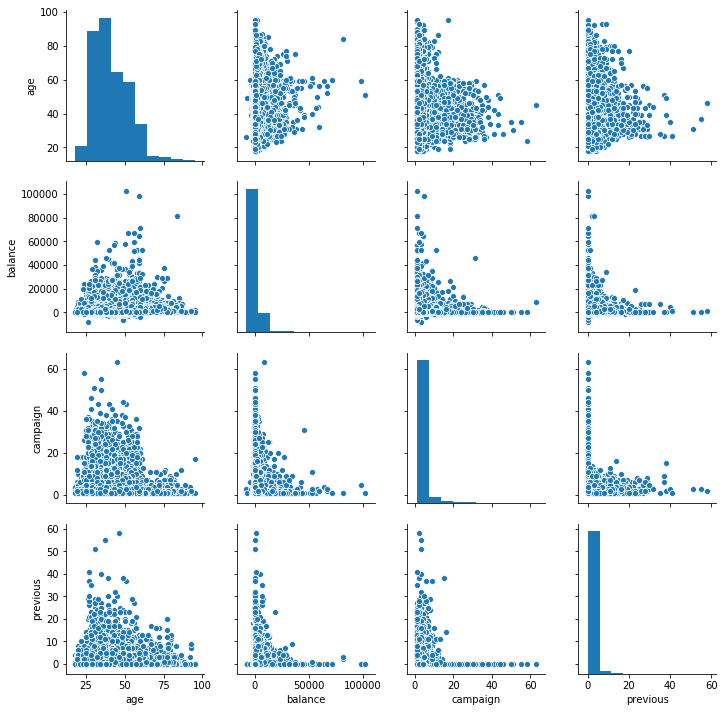

In [33]:
import matplotlib.pyplot as pt
import seaborn as sb

sb.pairplot(bank,
            palette = 'coolwarm'
            )

#### 1.5.2. Generando Histogramas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000271166C3F98>,
      dtype=object)

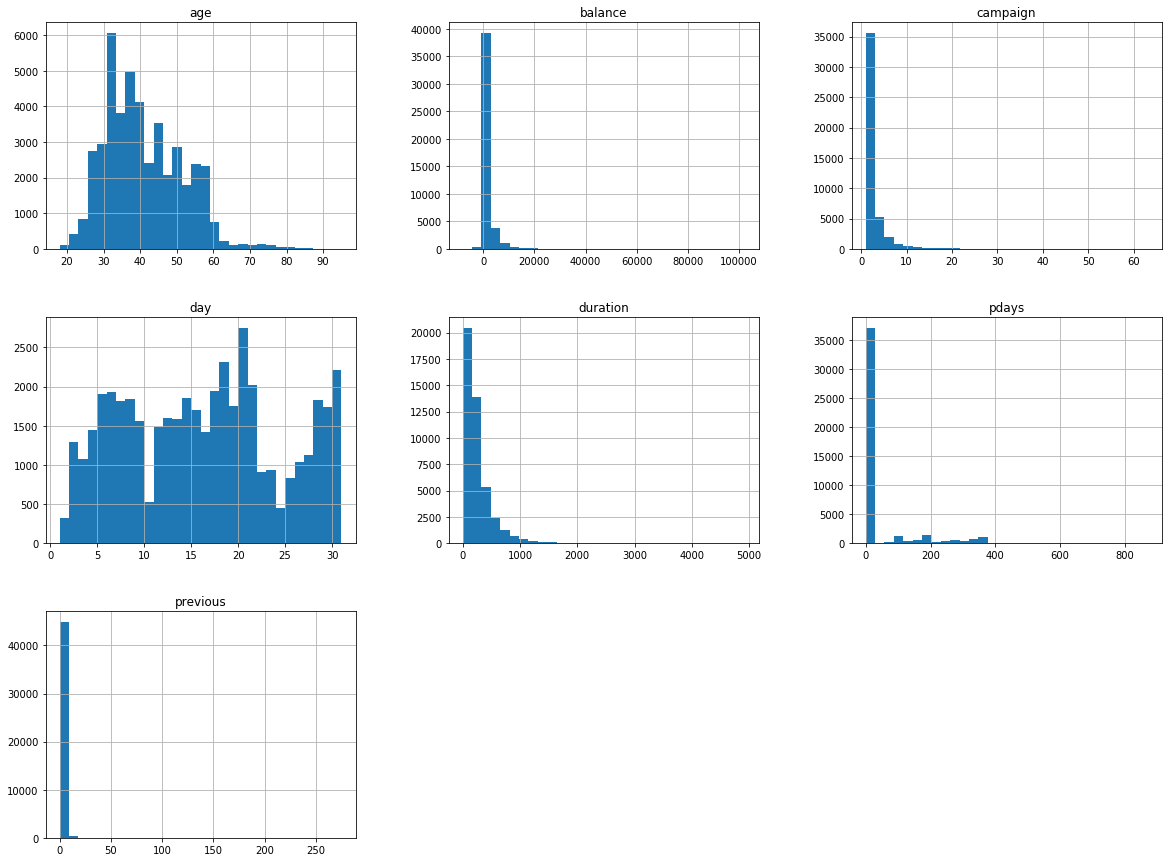

In [9]:
bank.hist(bins=30, figsize=(20,15))

#### 1.5.3. Generando Diagramas de Caja
Debido a las distintas escalas de los datos se generaron diagramas de caja independientes. En estos diagramas se puede observar que existes múltiples valores fuera de rango.

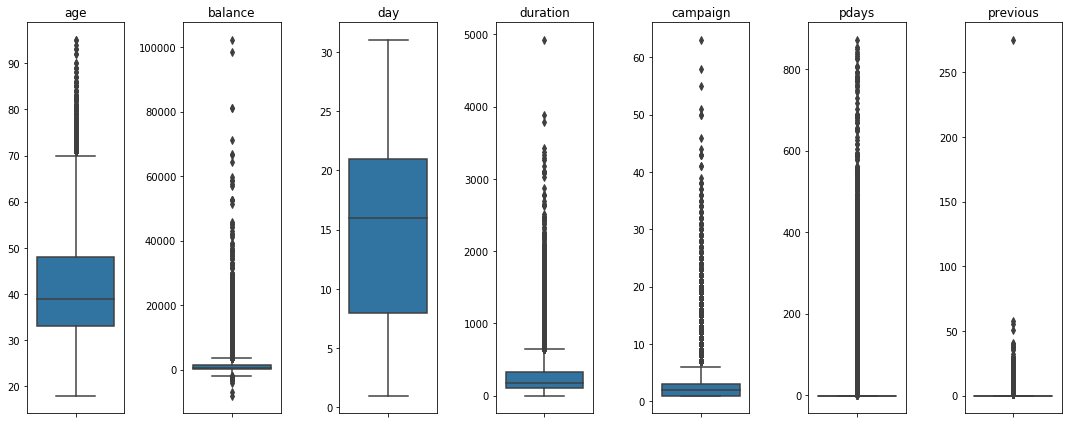

In [10]:
fig, axs = pt.subplots(1, len(num_keys), figsize=(15,6))

for i in range(len(num_keys)):
    axs[i].set_title(num_keys[i])
    sb.boxplot(bank[[num_keys[i]]], ax = axs[i], orient = 'v')

pt.tight_layout()

#### 1.5.4. Generando diagramas categoricos

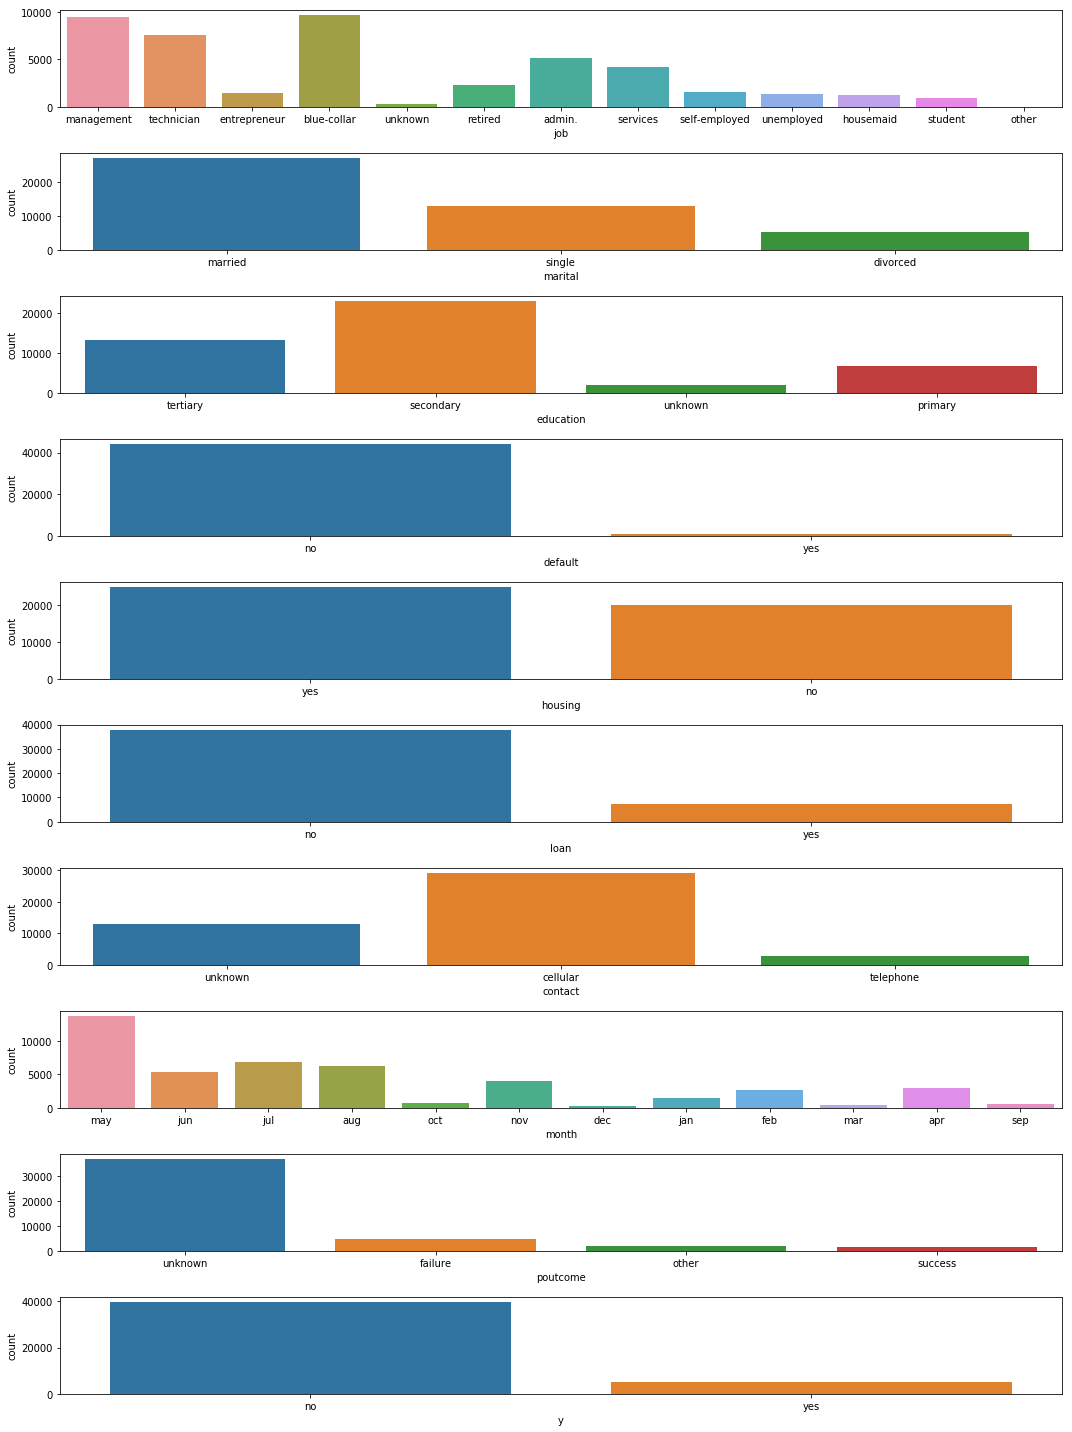

In [11]:
fig, axs = pt.subplots(len(not_num_keys), 1, figsize=(15,20))

for i in range(len(not_num_keys)):
    sb.countplot(x=not_num_keys[i], data = bank, ax = axs[i])

pt.tight_layout()

## 2. Preparación de datos

### 2.1. Remover ausencias
Debido a que las ausencias no son demasiadas se decide eliminarlas del dataset. En este caso se eliminan 21 registros por presentar ausencias.

In [12]:
for key in keys:
    bank.drop(bank[bank[key].isna() == True].index, inplace = True)
bank.shape

(45190, 17)

Se realiza verificación para las ausencias, encontrando que no queda ninguna.

In [13]:
size = len(bank)
keys = bank.keys()

nulls = []
values = []
Nvalues = []
for key in keys:
    nulls.append(len(bank[bank[key].isna() == True][key]))
    try:
        values.append(bank[key].unique())
        Nvalues.append(len(bank[key].unique()))
    except:
        values.append('NA')
        Nvalues.append('NA')

data = {'keys': keys, 
        'Nulls': nulls, 
        'Values': values,
        '# Values': Nvalues}

Details = pd.DataFrame(data=data)
Details

,keys,Nulls,Values,# Values
0,age,0,"[58.0, 44.0, 33.0, 47.0, 42.0, 43.0, 41.0, 29....",77
1,job,0,"[management, technician, entrepreneur, blue-co...",13
2,marital,0,"[married, single, divorced]",3
3,education,0,"[tertiary, secondary, unknown, primary]",4
4,default,0,"[no, yes]",2
5,balance,0,"[2143.0, 29.0, 2.0, 1506.0, 1.0, 121.0, 593.0,...",7167
6,housing,0,"[yes, no]",2
7,loan,0,"[no, yes]",2
8,contact,0,"[unknown, cellular, telephone]",3
9,day,0,"[5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21...",31


### 2.2. Selección de Variables
Acorde a la descripción del dataset y el objetivo del modelo se decide eliminar algunos atributos debido a que consideramos que no tienen relevancia para el caso, estas fueron las relacionadas con el último contacto de la actual campaña: day, month, contact, duration. 

Los atributos eliminados se dieron debido a que la necesidad del modelo a construir es identificar clientes potenciales para ofrecerles los servicios. Con esto en mente, consideramos que no es relevante incluir información de "cuando" se habló con el cliente, ya que no buscamos cuando es más eficiente llamar a los clientes, sino a que clientes debemos apuntar con las campañas.

In [14]:
bank.drop(['day', 'month', 'contact', 'duration'], 
          axis=1, 
          inplace = True)

In [15]:
list(bank.keys())

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

Se actualizan la lista de llaves.

In [16]:
num_keys = ['age', 'balance', 'campaign', 'pdays', 'previous']
not_num_keys = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']

### 2.3. Selección Mediante Varianza 
Realizamos análisis de varianza para establecer si alguna de las variables numéricas es eliminable mediante sklearn.feature_selection. Se encontró que ninguna es eliminable por este método.

In [17]:
from sklearn.feature_selection  import  VarianceThreshold 

bank[num_keys].shape

(45190, 5)

In [18]:
selector = VarianceThreshold(threshold = 0.95)
subset = selector.fit_transform(bank[num_keys])
subset
subset.shape

(45190, 5)

### 2.4. Análisis Adicional
Debido a que el análisis de la varianza no permitió la eliminación de atributos procedemos a analizar valores que pueden estar fuera de rango o que son poco informativos.

#### pdays
Como se muestra en el histograma del punto 1.5.2, el atributo pdays tiene valores altos que muestran que los clientes no han sido contactados en mucho tiempo (oportunidad para la campaña). El 81.74 % de los datos son "-1", lo que quiere decir que el cliente no ha sido contactado nunca. Y los datos siguientes muestran clientes no contactados a menudo. Por estas razones se elimina esta variable del análisis por no considerarla lo suficientemente informativa para el modelo a construir.

In [19]:
grouped = bank.groupby('pdays')['y'].size().reset_index()
grouped.sort_values('y', ascending=False).head(5)

,pdays,y
0,-1.0,36942
179,182.0,167
89,92.0,147
88,91.0,126
180,183.0,126


In [20]:
bank.drop(['pdays'], 
          axis=1, 
          inplace = True)

#### Previous
De acuerdo con el diagrama de caja del punto 1.5.3. se encuentra que hay uno o más posibles valores fuera de rango para el atributo previous. El valor de 275 no tiene mucho sentido como número de veces que se contacto a un cliente, además que el valor que le sigue es 32. Por estas razones se elimina del dataset

In [21]:
grouped = bank.groupby('previous')['y'].size().reset_index()
grouped.sort_values('y', ascending=True).head(5)

,previous,y
40,275,1
31,32,1
32,35,1
35,40,1
39,58,1


In [22]:
bank.drop(bank[bank['previous']==275].index, inplace = True)

In [23]:
bank.shape

(45189, 12)

Se actualizan las llaves

In [24]:
num_keys = ['age', 'balance', 'campaign', 'previous']
not_num_keys = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']

# 3. Dataset Final

## 3.1. Balanceo de Clases
Debido a que las clases no estan balanceadas, se procede a balancearlas mediante sobremuestreo.

In [25]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,campaign,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,1.0,0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,1.0,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,1.0,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,1.0,0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,1.0,0,unknown,no


### Clases Desbalanceadas
Las clases estan desbalanceadas, el 88.29 % de las clases es 'no' y el 11.70 % restante para el 'si'. Para esto usaremos sobremuestreo.

In [26]:
grouped = bank.groupby('y')['y'].size()
grouped

y
no     39900
yes     5289
Name: y, dtype: int64

In [27]:
list(bank.keys())

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'campaign',
 'previous',
 'poutcome',
 'y']

In [28]:
from imblearn.over_sampling import SMOTENC

In [29]:
# Se especifican los atributos categoricos
sm = SMOTENC(categorical_features=[1,2,3,4,6,7,10], random_state=2) 

#clase
bank_class = bank['y']

#atributos
bank_nclass = bank[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'campaign', 'previous', 'poutcome']]

#Balanceo
bank_nclass_balanced, bank_class_balanced = sm.fit_sample(bank_nclass, bank_class)

## 3.2. Dataset Balanceado
Finalmente se tiene el archivo balanceado

In [30]:
bank_balanced = pd.DataFrame(bank_nclass_balanced, columns=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'campaign', 'previous', 'poutcome'])
bank_balanced['y'] = pd.DataFrame(bank_class_balanced, columns=['y'])
bank_balanced.head()

,age,job,marital,education,default,balance,housing,loan,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,1,0,unknown,no


In [31]:
bank_balanced.shape

(79800, 12)

### Estado final de las clases

In [32]:
grouped = bank_balanced.groupby('y')['y'].size()
grouped

y
no     39900
yes    39900
Name: y, dtype: int64